In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # For plots

In [2]:
data = pd.read_csv('../data/onti_c.csv', low_memory=False, index_col=['Time'], parse_dates=['Time'])
data.head()

,Coolness_RHEED,R FWHM_RHEED,Time_RHEED,X FWHM_RHEED,Y FWHM_RHEED,Crystal Position,Filtered Rate,Length,Raw Rate,Source Power
Time,,,,,,,,,,
2021-02-23 02:21:05,0.0,0.0,2021-02-23 02:21:05,0.0,0.0,1.0,6.000,0.003721,5.990,21.64
2021-02-23 02:21:06,0.0,0.0,2021-02-23 02:21:06,0.0,0.0,1.0,6.094,0.028870,6.110,21.06
2021-02-23 02:21:07,0.0,0.0,2021-02-23 02:21:07,0.0,0.0,1.0,6.082,0.040400,6.168,20.97
2021-02-23 02:21:08,0.0,0.0,2021-02-23 02:21:08,0.0,0.0,1.0,6.168,0.067750,6.156,20.70
2021-02-23 02:21:09,0.0,0.0,2021-02-23 02:21:09,0.0,0.0,1.0,6.168,0.083560,6.145,20.60


In [5]:
%matplotlib inline
plt.style.use('Solarize_Light2')
sns.set_context(
    "notebook",
    rc={
        "figure.figsize": (17, 8),
        "axes.titlesize": 18
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 17, 8

%config InlineBackend.figure_format = 'retina'

,Coolness_RHEED,R FWHM_RHEED,X FWHM_RHEED,Y FWHM_RHEED,Crystal Position,Filtered Rate,Length,Raw Rate,Source Power
Coolness_RHEED,1.000000,0.727862,0.743932,0.836942,0.109230,0.419062,0.066965,0.207889,0.337766
R FWHM_RHEED,0.727862,1.000000,0.968505,0.940464,-0.011920,0.329236,-0.024468,0.122989,0.339623
X FWHM_RHEED,0.743932,0.968505,1.000000,0.951568,0.004113,0.335537,-0.023305,0.115511,0.357949
Y FWHM_RHEED,0.836942,0.940464,0.951568,1.000000,0.034261,0.346575,0.009145,0.126334,0.366063
Crystal Position,0.109230,-0.011920,0.004113,0.034261,1.000000,-0.065491,0.845053,-0.063199,0.099469
Filtered Rate,0.419062,0.329236,0.335537,0.346575,-0.065491,1.000000,-0.065182,0.486695,0.632677
Length,0.066965,-0.024468,-0.023305,0.009145,0.845053,-0.065182,1.000000,0.000928,0.077754
Raw Rate,0.207889,0.122989,0.115511,0.126334,-0.063199,0.486695,0.000928,1.000000,-0.238467
Source Power,0.337766,0.339623,0.357949,0.366063,0.099469,0.632677,0.077754,-0.238467,1.000000


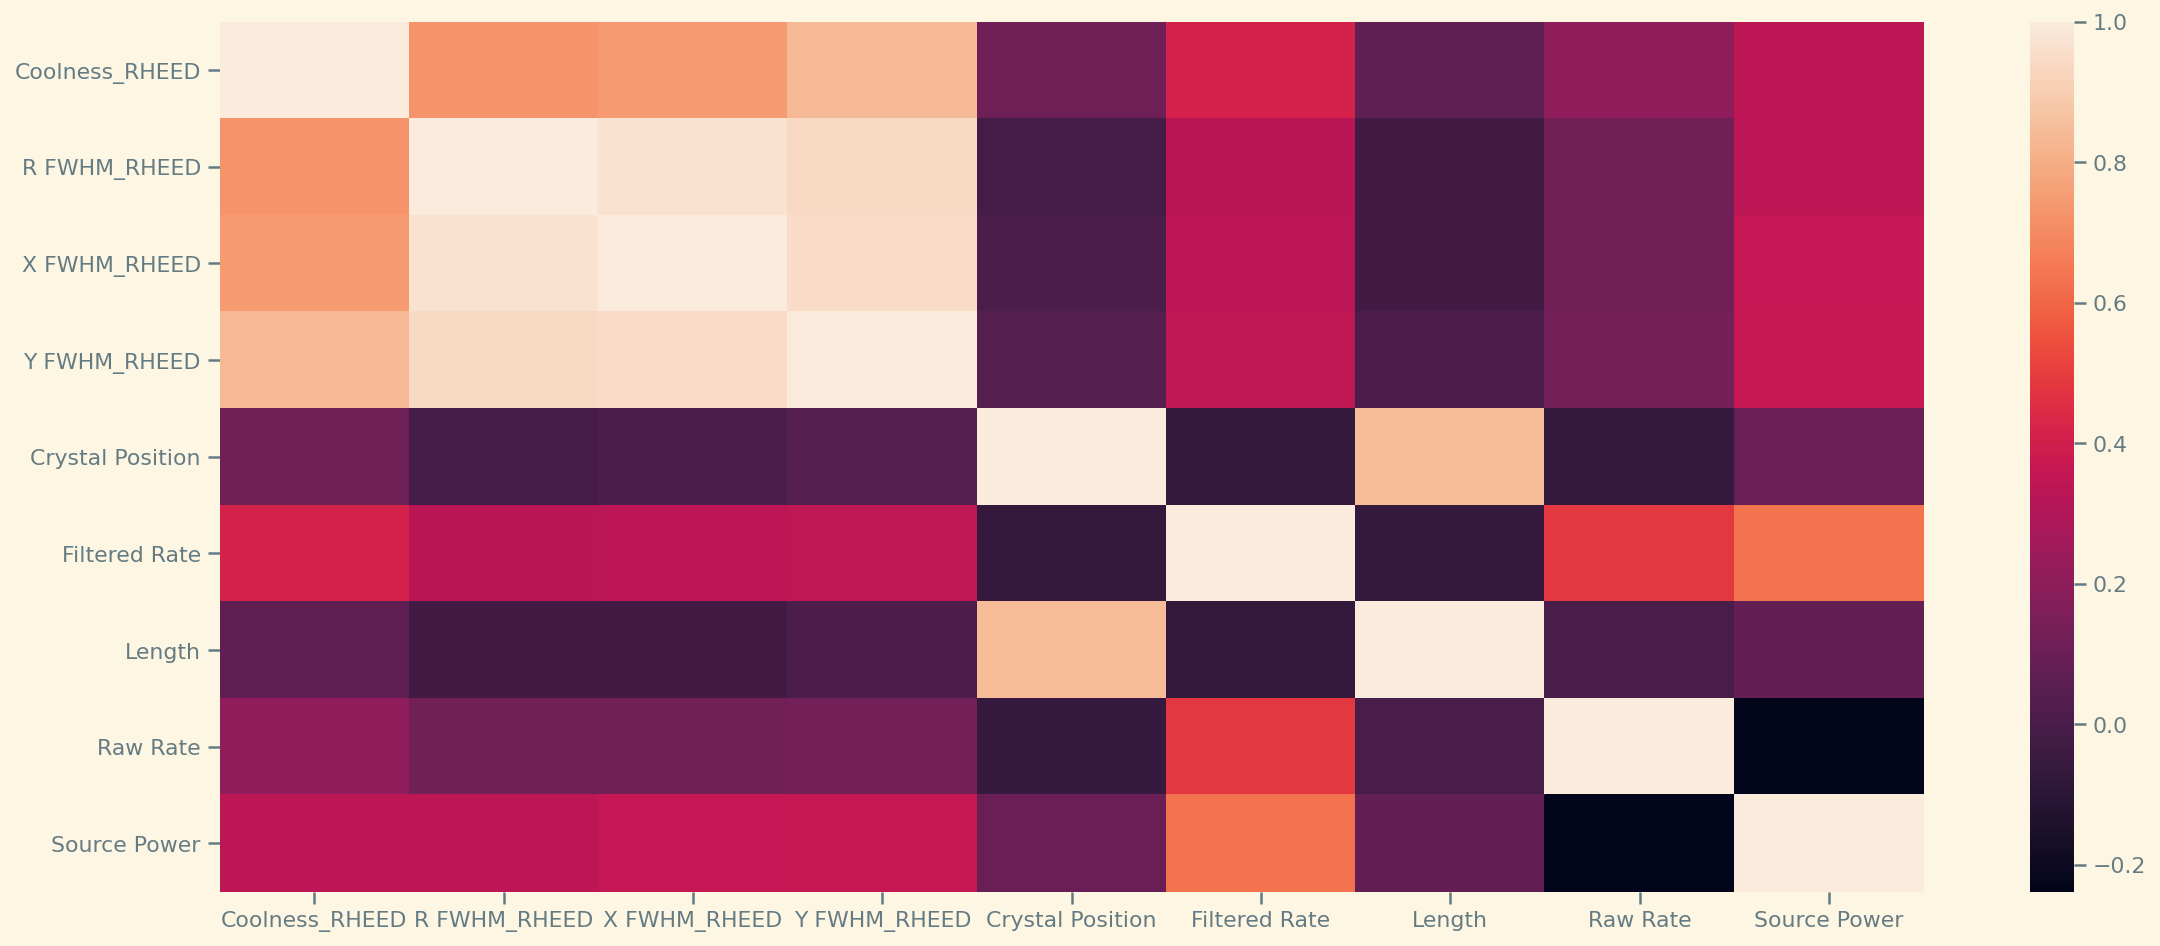

In [7]:
corr = data.corr()
sns.heatmap(data=corr)
corr

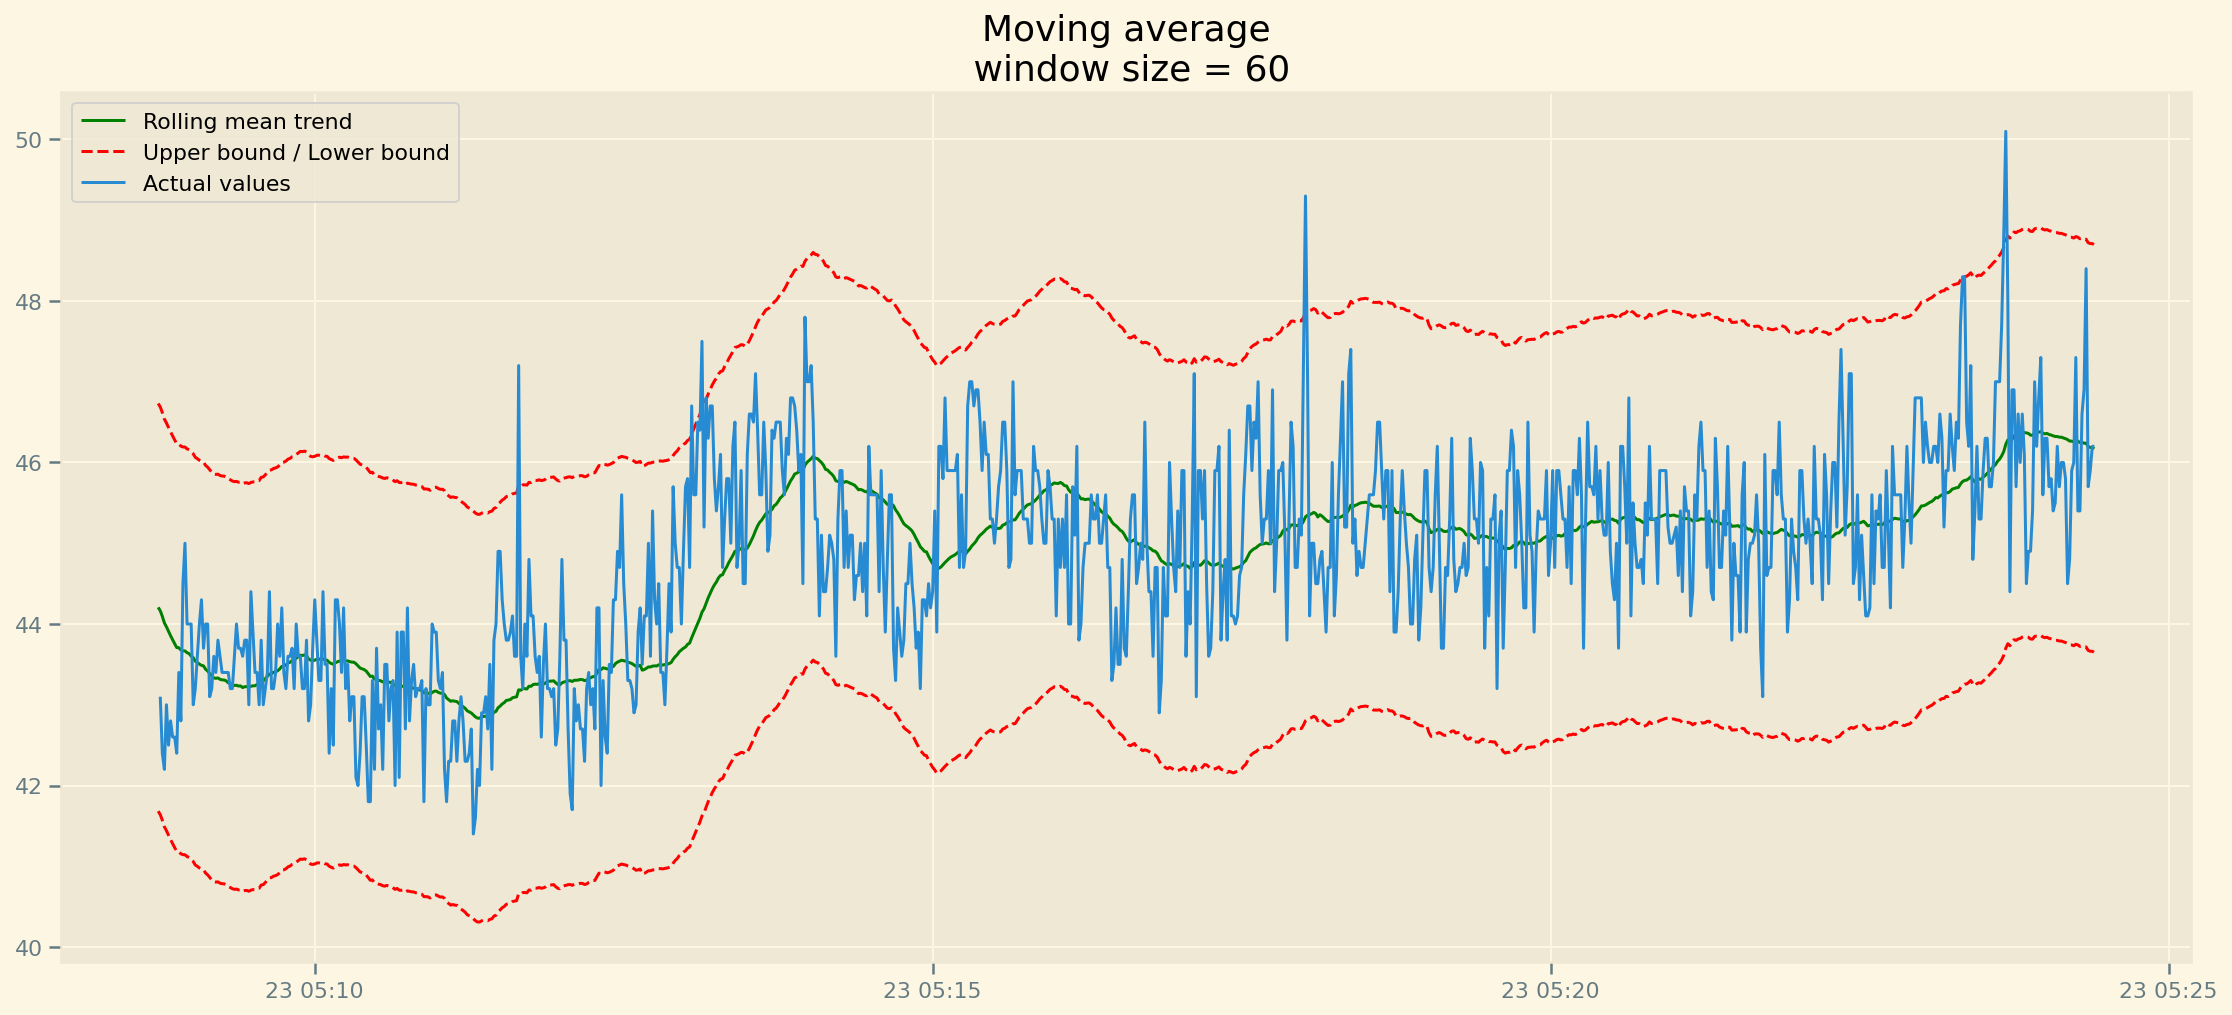

In [14]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error

def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

data_sm = data.iloc[10000:11000:1, :]
plot_moving_average(data_sm['Coolness_RHEED'], 60, plot_intervals=True)